In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import warnings
warnings.filterwarnings('ignore')

In [15]:
import pandas as pd
from causalnex.structure.notears import from_pandas
from script import plot
from causalnex.structure import StructureModel
from IPython.display import Image
from causalnex.structure.notears import from_pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [16]:
from script import load_file
from script.show_df_info import Df_Info
from script.clean_df import Df_clean

In [17]:
cleaned_data = load_file.read_csv('../data/clean_data.csv')

In [18]:
mean_columns = [x for x in cleaned_data.columns if 'mean' in x]
mean_columns.extend(['id','diagnosis'])
selected_columns = [x for x in mean_columns]

data_selected = cleaned_data[selected_columns]
data_selected.set_index('id', inplace=True)
data_selected.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
id,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,M
842517,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,M
84300903,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,M
84348301,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,M
84358402,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,M


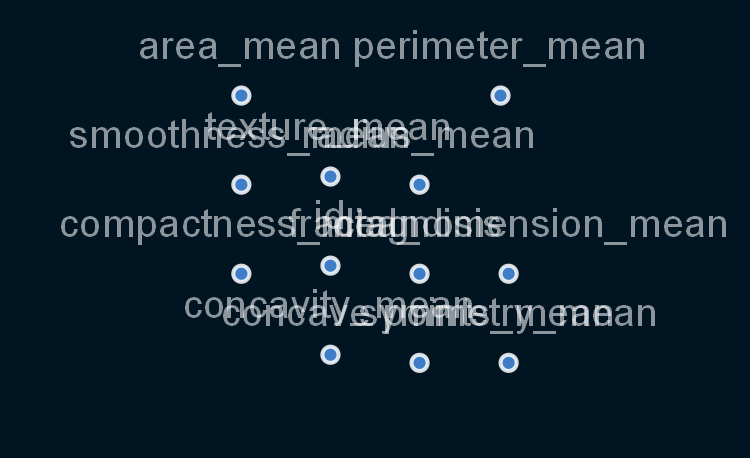

In [19]:
#cleaned_data['diagnosis'] = cleaned_data['diagnosis'].apply(lambda x: 1 if x == "M" else 0)
#sm = from_pandas(cleaned_data)

cleaned_data.loc[cleaned_data['diagnosis'] == 'M', 'diagnosis'] = 1
cleaned_data.loc[cleaned_data['diagnosis'] == 'B', 'diagnosis'] = 0

cleaned_data = cleaned_data.astype(int)
sm = from_pandas(cleaned_data.iloc[:, :12], tabu_parent_nodes=['diagnosis'],)
Image(plot.plot_structure_1(sm).draw(format="png"))

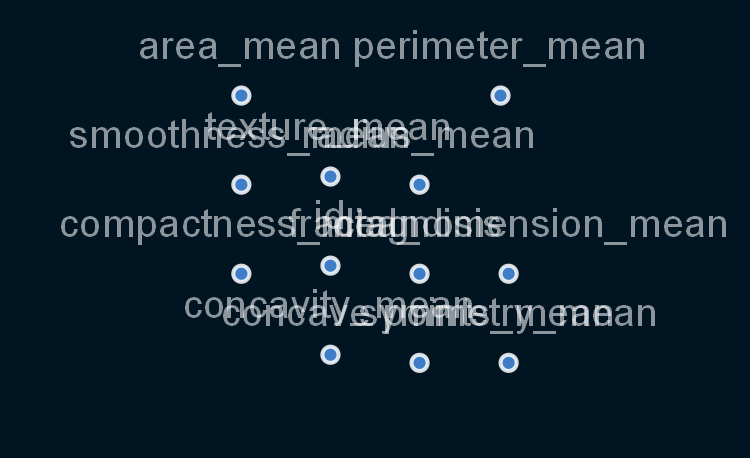

In [20]:
sm = from_pandas(cleaned_data.iloc[:, :12], tabu_edges=[("area_mean", "perimeter_mean")], w_threshold=0.8)
Image(plot.plot_structure_1(sm).draw(format="png"))

In [21]:
sm = StructureModel()

sm.add_edges_from([
    ('diagnosis', 'radius_worst'),
    ('diagnosis', 'concave points_worst'),
    ('perimeter_mean', 'diagnosis'),
    ('area_mean','diagnosis')
])

In [22]:
sm.edges

OutEdgeView([('diagnosis', 'radius_worst'), ('diagnosis', 'concave points_worst'), ('perimeter_mean', 'diagnosis'), ('area_mean', 'diagnosis')])

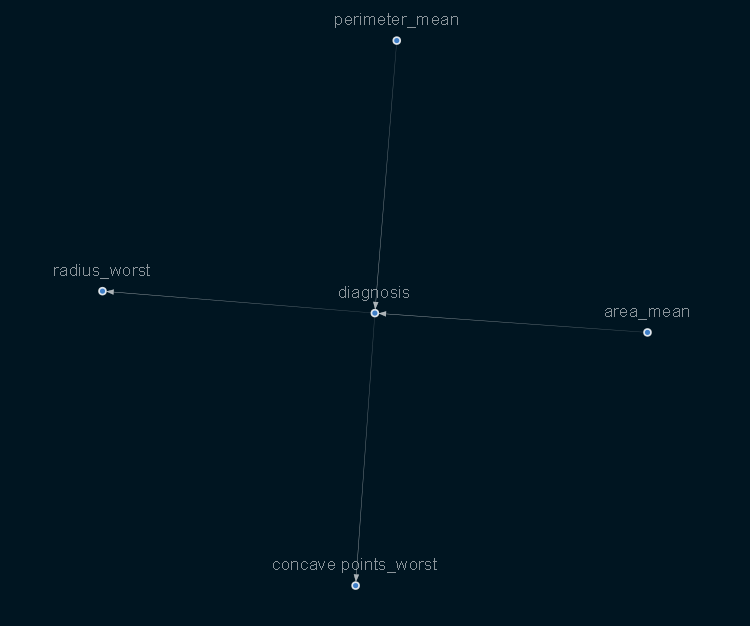

In [23]:
Image(plot.plot_structure_1(sm).draw(format="png"))